# **Convolutional Neural Network (CNN) with Advanced Architectures**

 *Objective: Construct and evaluate a CNN with advanced architectural components for image classification tasks*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-01 13:53:07.000698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 13:53:07.724569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **Load Dataset MNIST and Data Augment**

In [2]:
# load and split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


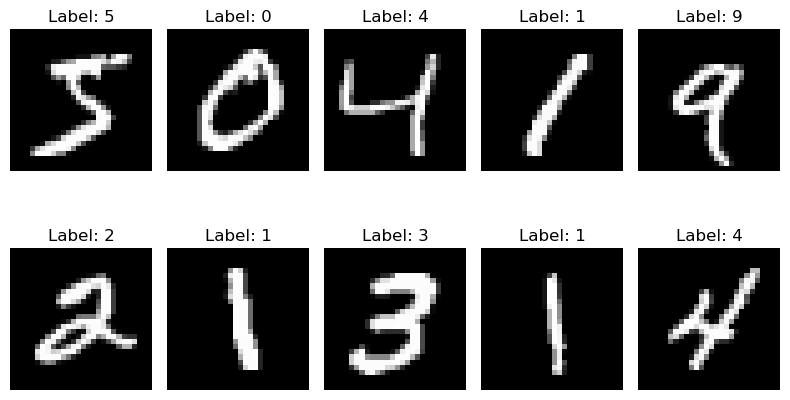

In [3]:
# data
plt.figure(figsize=(8, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


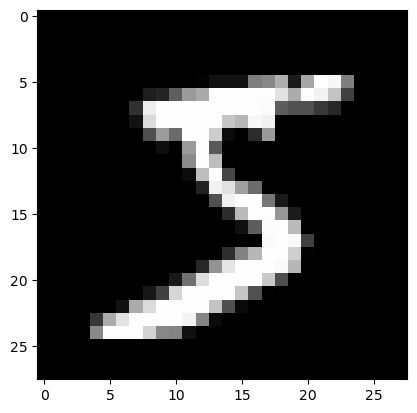

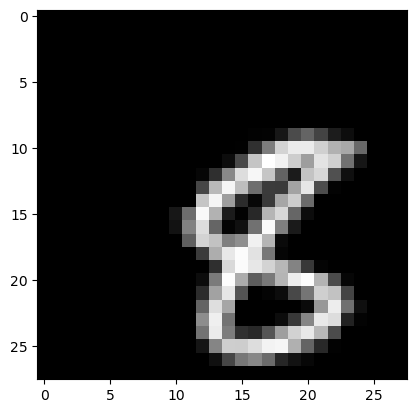

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


datagen = ImageDataGenerator(
    rotation_range=20,       # rotations
    width_shift_range=0.2,   # hshifts
    height_shift_range=0.2,  # vshifts
    shear_range=0.2,         # shear
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # horizontal flips
    fill_mode='nearest'      # fill mode for new pixels
)

datagen.fit(x_train)

# viz
sample = x_train[0].reshape(28, 28)
plt.imshow(sample, cmap='gray')
plt.show()

for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=1):
    augmented_image = X_batch[0].reshape(28, 28)
    plt.imshow(augmented_image, cmap='gray')
    plt.show()
    break

## **CNN Architecture**

In [5]:
# more advanced CNN
def create_advanced_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.25))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

advanced_model = create_advanced_cnn()
advanced_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

2024-10-01 13:53:10.409060: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 904 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:42:00.0, compute capability: 7.5


 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 batch_normalization_5 (Batc  (None, 7, 7, 128)        512       
 hNormaliz

In [6]:
# create cnn baseline
def create_baseline_cnn(input_shape=(28, 28, 1), num_classes=10):
    baseline_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return baseline_model

baseline_model = create_baseline_cnn()
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 128)       

## **Training and Evaluation**

In [7]:
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 20
batch_size = 64

# train both models and compare
history_baseline = baseline_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

history_advanced = advanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20


2024-10-01 13:53:10.840483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-01 13:53:11.603525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-10-01 13:53:11.893731: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fe324044020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-01 13:53:11.893794: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-10-01 13:53:11.900351: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-01 13:53:12.

937/937 [==============================] - 20s 19ms/step - loss: 0.5682 - accuracy: 0.8087 - val_loss: 0.1419 - val_accuracy: 0.9514
Epoch 2/20
937/937 [==============================] - 18s 19ms/step - loss: 0.1884 - accuracy: 0.9408 - val_loss: 0.0913 - val_accuracy: 0.9714
Epoch 3/20
937/937 [==============================] - 17s 19ms/step - loss: 0.1415 - accuracy: 0.9551 - val_loss: 0.0770 - val_accuracy: 0.9750
Epoch 4/20
937/937 [==============================] - 17s 18ms/step - loss: 0.1213 - accuracy: 0.9629 - val_loss: 0.0675 - val_accuracy: 0.9791
Epoch 5/20
937/937 [==============================] - 18s 19ms/step - loss: 0.1090 - accuracy: 0.9659 - val_loss: 0.0523 - val_accuracy: 0.9839
Epoch 6/20
937/937 [==============================] - 17s 18ms/step - loss: 0.1013 - accuracy: 0.9684 - val_loss: 0.0666 - val_accuracy: 0.9775
Epoch 7/20
937/937 [==============================] - 17s 18ms/step - loss: 0.0945 - accuracy: 0.9709 - val_loss: 0.0623 - val_accuracy: 0.9807
Epo

2024-10-01 13:58:55.513568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-10-01 13:58:56.733199: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


937/937 [==============================] - 21s 18ms/step - loss: 0.6293 - accuracy: 0.8003 - val_loss: 0.1070 - val_accuracy: 0.9655
Epoch 2/20
937/937 [==============================] - 17s 18ms/step - loss: 0.2111 - accuracy: 0.9358 - val_loss: 0.0648 - val_accuracy: 0.9777
Epoch 3/20
937/937 [==============================] - 16s 17ms/step - loss: 0.1685 - accuracy: 0.9492 - val_loss: 0.0566 - val_accuracy: 0.9812
Epoch 4/20
937/937 [==============================] - 16s 18ms/step - loss: 0.1406 - accuracy: 0.9564 - val_loss: 0.0571 - val_accuracy: 0.9824
Epoch 5/20
937/937 [==============================] - 16s 18ms/step - loss: 0.1270 - accuracy: 0.9609 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 6/20
937/937 [==============================] - 16s 17ms/step - loss: 0.1200 - accuracy: 0.9633 - val_loss: 0.0545 - val_accuracy: 0.9823
Epoch 7/20
937/937 [==============================] - 16s 17ms/step - loss: 0.1101 - accuracy: 0.9663 - val_loss: 0.0498 - val_accuracy: 0.9836
Epo

## **Plot Results**

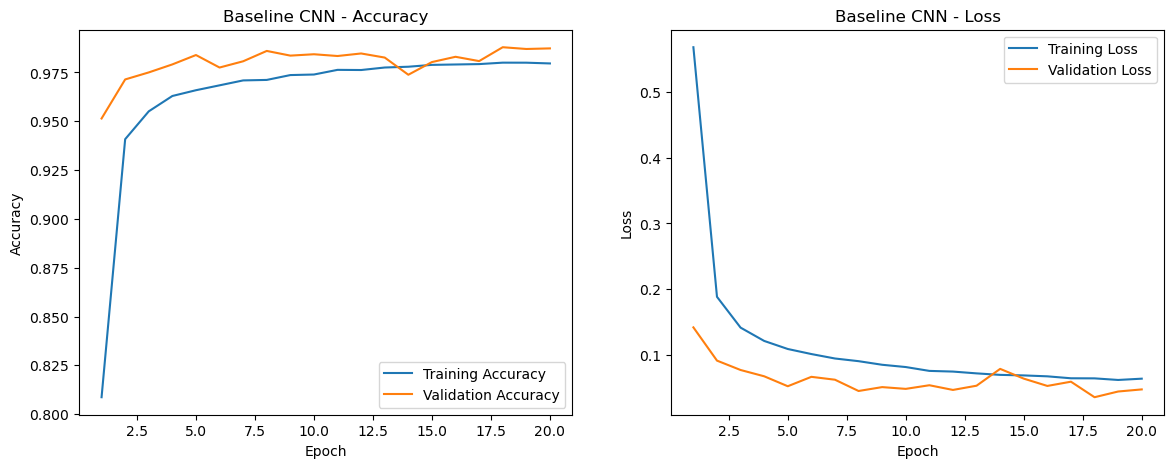

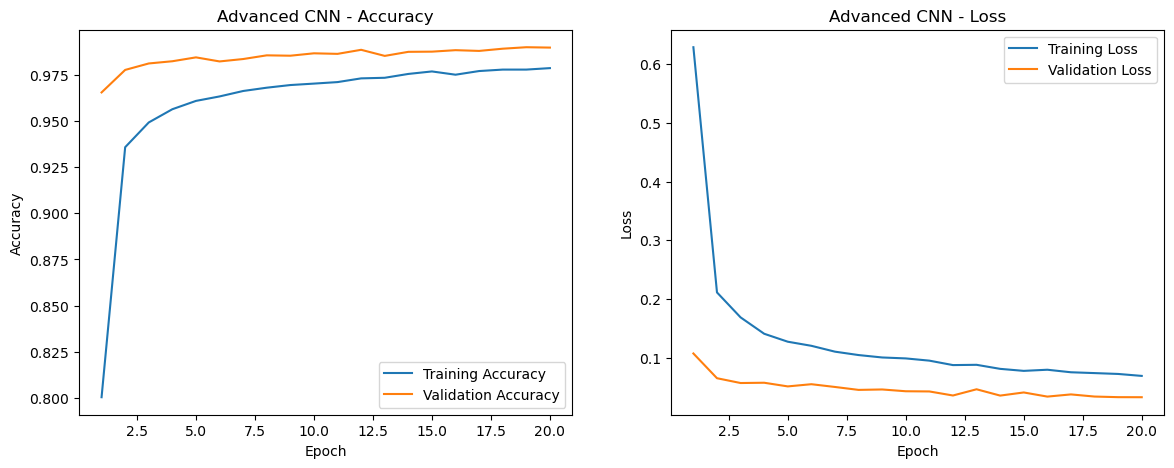

In [8]:
def plot_training_curves(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    plt.figure(figsize=(14, 5))

    # accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

plot_training_curves(history_baseline, 'Baseline CNN')
plot_training_curves(history_advanced, 'Advanced CNN')


## **Compare models**

In [9]:
# evaluate Baseline Model
test_loss_baseline, test_acc_baseline = baseline_model.evaluate(x_test, y_test)
print(f'Baseline CNN Test Accuracy: {test_acc_baseline:.4f}, Test Loss: {test_loss_baseline:.4f}')

# evaluate Advanced Model
test_loss_advanced, test_acc_advanced = advanced_model.evaluate(x_test, y_test)
print(f'Advanced CNN Test Accuracy: {test_acc_advanced:.4f}, Test Loss: {test_loss_advanced:.4f}')


313/313 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9873
Baseline CNN Test Accuracy: 0.9873, Test Loss: 0.0475
313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9898
Advanced CNN Test Accuracy: 0.9898, Test Loss: 0.0324


313/313 [==============================] - 1s 2ms/step


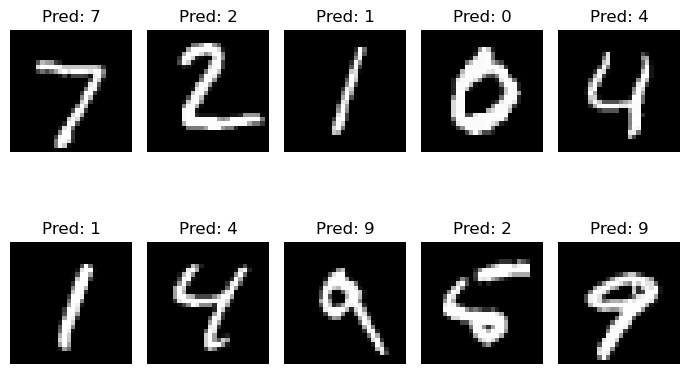

In [13]:
# make predictions using the trained model
predictions = advanced_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# samples
num_samples = 10
plt.figure(figsize=(7, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Data augmentation was used in this notebook to increase the diversity of the training set by applying rotation, shifting, shearing, zooming, and horizontal flipping. 

The advanced CNN architecture is built with convolutional blocks, pooling layers, dropout layers, and fully connect layers. The layers consisted of 32, 64, 128, and 256 units. Each layer consisted of two convolutional layers followed by batch normalization and a pooling layer. The batch normalization normalizes the output of previous layers to stabilize the training proces. While pooling layers reduce the spatial dimension by taking the maximum value from each pool and then downsampling. Gloablaveragepooling2D takes the average and reduces the number of parameters. Drop out layer randomly drops some input units during training, again to also help with overfitting. 

We can compare the advanced and baseline models and we see a little difference. The advanced model had higher accuracy score than the baseline. Additionally the advnaced took a little bit more time to compute than the baseline. We can see from the accuracy and loss curves, the baseline was a little bit less smooth than the advanced. Both performed very well in this case. Overall, the differences in these two depends on user requirements. 